## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Лебеденко |
|---------|-----------|
| Группа  | 301Б      |

Для начала, скачаем датасет MNIST. Используйте `wget` или `curl`, либо скачайте вручную [по ссылке](https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz).

Теперь загружаем датасет:

In [1]:
import pickle
with open('mnist.pkl','rb') as f:
    MNIST = pickle.load(f)

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
print("tensorflow version: "+tf.__version__)
print("keras version: "+keras.__version__)

tensorflow version: 2.8.0
keras version: 2.8.0


In [3]:
labels = MNIST['Train']['Labels']
data = MNIST['Train']['Features'].astype(np.float32)/256

Смотрим на то, какие данные получились:

In [4]:
data.shape

(42000, 784)

Используйте Scikit Learn для разбиения данных на обучающую и тестовую выборку

In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, stratify=labels,test_size=0.2)

In [6]:
test_data = np.array([data / 255 for data in test_data])
train_data = np.array([data / 255 for data in train_data])

# Keras
### MNIST

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [12]:
history = model.fit(train_data, train_labels, epochs=15)

Epoch 1/15
1050/1050 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.8164
Epoch 2/15
1050/1050 [==============================] - 1s 1ms/step - loss: 0.5843 - accuracy: 0.8256
Epoch 3/15
1050/1050 [==============================] - 1s 1ms/step - loss: 0.5607 - accuracy: 0.8339
Epoch 4/15
1050/1050 [==============================] - 1s 1ms/step - loss: 0.5392 - accuracy: 0.8415
Epoch 5/15
1050/1050 [==============================] - 1s 1ms/step - loss: 0.5215 - accuracy: 0.8464
Epoch 6/15
1050/1050 [==============================] - 1s 1ms/step - loss: 0.5062 - accuracy: 0.8509
Epoch 7/15
1050/1050 [==============================] - 1s 1ms/step - loss: 0.4930 - accuracy: 0.8540
Epoch 8/15
1050/1050 [==============================] - 1s 1ms/step - loss: 0.4805 - accuracy: 0.8586
Epoch 9/15
1050/1050 [==============================] - 1s 1ms/step - loss: 0.4703 - accuracy: 0.8620
Epoch 10/15
1050/1050 [==============================] - 1s 1ms/step - loss: 0.460

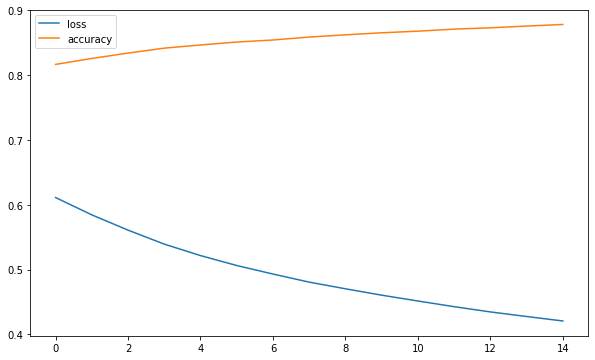

In [13]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.show()

In [14]:
model.test_on_batch(test_data ,test_labels)

[0.4431709945201874, 0.8720238208770752]

### Fashion MNIST

In [16]:
(train_data, train_labels), (test_data ,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [18]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1716 - accuracy: 0.7319
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6596 - accuracy: 0.7826
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6003 - accuracy: 0.8001
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5330 - accuracy: 0.8195
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4932 - accuracy: 0.8299
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4435 - accuracy: 0.8439
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4221 - accuracy: 0.8485
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4032 - accuracy: 0.8548
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3939 - accuracy: 0.8588
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.390

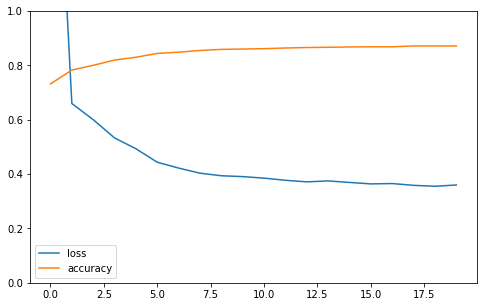

In [21]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(0, 1.0)
plt.show()

In [22]:
model.test_on_batch(x_test,y_test)

[0.4585808217525482, 0.8457000255584717]

In [6]:
dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels.astype(np.float32)))
dataset = dataset.batch(10)
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.01)

learning_rate = 0.05

W = tf.Variable(tf.random.normal(shape=(784,1)))
b = tf.Variable(tf.zeros(shape=(10,1),dtype=tf.float32))

@tf.function
def train_on_batch(x, y):
  vars = [W, b]
  with tf.GradientTape() as tape:
    z = tf.matmul(x, W) + b
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(z,y))
    correct_prediction = tf.equal(tf.round(y), tf.round(z))
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    grads = tape.gradient(loss, vars)
    optimizer.apply_gradients(zip(grads,vars))
  return loss,acc

for epoch in range(40):
      for step, (x, y) in enumerate(dataset):
            loss,acc = train_on_batch(tf.reshape(x,(-1,784)), tf.reshape(y,(10,-1)))
      print('Epoch %d: last batch loss = %.4f, acc = %.4f' % (epoch, float(loss),acc))